In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# 1. 

In [2]:
line1 = np.array([89,93,83,88])
line2 = np.array([100,86,78,86])
line3 = np.array([97,90,88,91])
line4 = np.array ([83,99,100,96])
line5 = np.array([100,81,75,83])

finalarray = np.array([line1, line2, line3, line4, line5])
x = finalarray[:,:-1]
y = finalarray[:,-1]
print(x)
print(y)

[[ 89  93  83]
 [100  86  78]
 [ 97  90  88]
 [ 83  99 100]
 [100  81  75]]
[88 86 91 96 83]


In [3]:
b = np.asmatrix((x.T@x)).I@x.T@y

In [4]:
print("Coefficients: ", b)

Coefficients:  [[0.23083893 0.33911109 0.43272626]]



#### Double-checking with final results

In [5]:
print((x@b.T).round(3))

[[87.998]
 [86.   ]
 [90.991]
 [96.004]
 [83.006]]


# 2.

Coefficients:  [[0.23077804]
 [0.33944211]
 [0.43244321]]


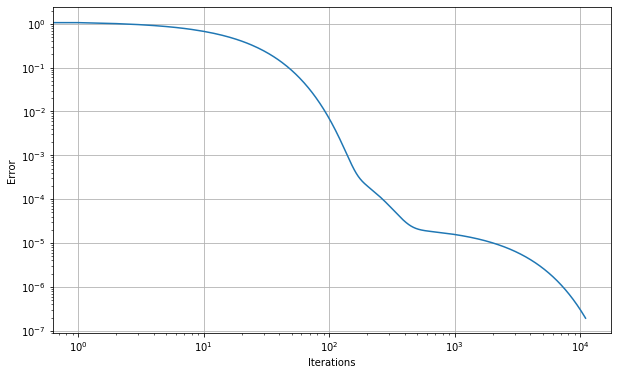

In [6]:
X = np.array([[89,93,83], [100,86,78],[97,90,88],[83,99,100], [100,81,75]])
Y = np.array([88, 86,91, 96, 83])
def grd_descent(x,y, step_size, iterations):
    value_change=[]
    a = np.array([[0.0], [0.0], [0.0]])
    for i in range (iterations):
        cgradient = 2*(a.T@x.T-y.T)@x
        change=-(step_size*cgradient).T
        a = a+change
        value_change.append(np.linalg.norm(change))       
    print("Coefficients: ",a)
    return value_change
num_iters=11000
result=grd_descent(X,Y, 0.0000081, num_iters)
plt.figure(figsize=(10,6))
plt.plot(range(int(num_iters)), result)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid()
    

## 2.e Same approach but using while loop and break for stopping after being close enough to the desired result. Less iterations and better performance than fixed count of loop

Got coefficients after 7259 iterations: [[0.23052389]
 [0.34082373]
 [0.43126183]]


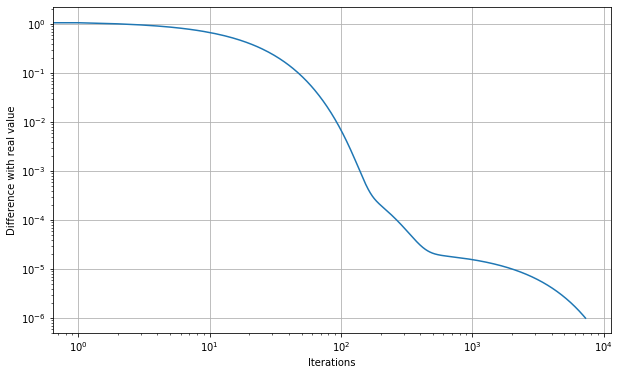

In [7]:
X = np.array([[89,93,83], [100,86,78],[97,90,88],[83,99,100], [100,81,75]])
Y = np.array([88, 86,91, 96, 83])

def grd_descent(x,y, step_size, iterations):
    value_change=[]
    a = np.array([[0.0], [0.0], [0.0]])
    change = 1
    loop=0
    while np.linalg.norm(change)>0.000001:
        cgradient = 2*(a.T@x.T-y.T)@x
        change=-(step_size*cgradient).T
        a = a+change
        value_change.append(np.linalg.norm(change)) #matrix norm for error estimation
        loop+=1
        
    
    print("Got coefficients after", loop, "iterations:", a)
    
    return value_change

result=grd_descent(X,Y, 0.0000081, num_iters)
plt.figure(figsize=(10,6))
plt.plot(result)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Iterations")
plt.ylabel("Difference with real value")
plt.grid()

## 3. Examine what happens to the gradient descent algorithm with different step sizes.Write a short summary of your conclusions.

Gradient descent is taking small steps in the direction of the minimum. If the step size is too large, it can "jump over" the minima we are trying to reach and that was the case that I was having. After discussion with instructor and doing more research on step size, I have realized that the step size that I was utilizing (0.1) was incredibly high and I was jumping over the solution even from first steps and going more away. So, if we are using constant step size (not dynamic, 2nd order derivative etc.) we have to be careful with choosen step size.

In [10]:
Image(url= "https://duchesnay.github.io/pystatsml/_images/learning_rate_choice.png")